<a href="https://colab.research.google.com/github/golkondarohith/Scikit-Learn/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


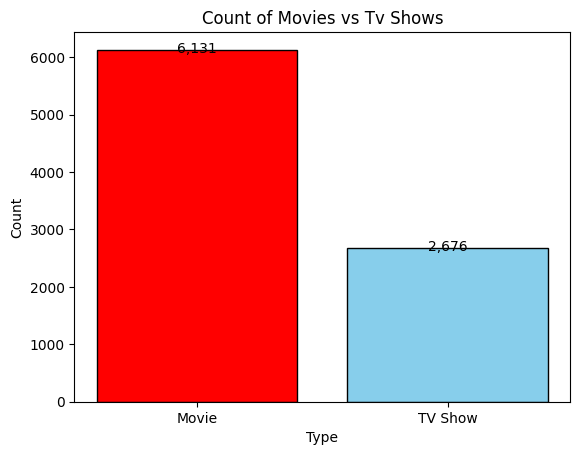

In [40]:
#BAR CHART
count = df["type"].value_counts()
count

bars = plt.bar(count.index, count, color=["red", "skyblue"], edgecolor = 'black')
plt.title("Count of Movies vs Tv Shows")
plt.xlabel("Type")
plt.ylabel("Count")

#Add value lables
for bar in bars:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-100,
           f'{bar.get_height():,}', ha ='center', va='bottom', color='black')
plt.show()

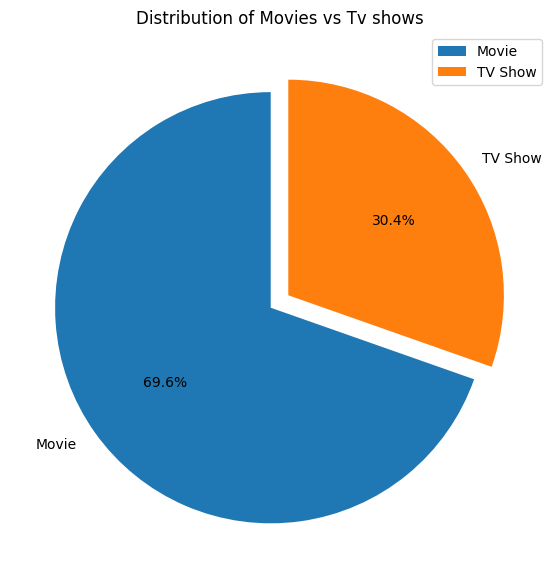

In [62]:
#PIE CHART
plt.figure(figsize=(7,7))
plt.pie(count, labels=count.index, autopct="%1.1f%%", explode=[0.05, 0.05], startangle = 90)
plt.title("Distribution of Movies vs TV shows")
plt.legend()
plt.show()

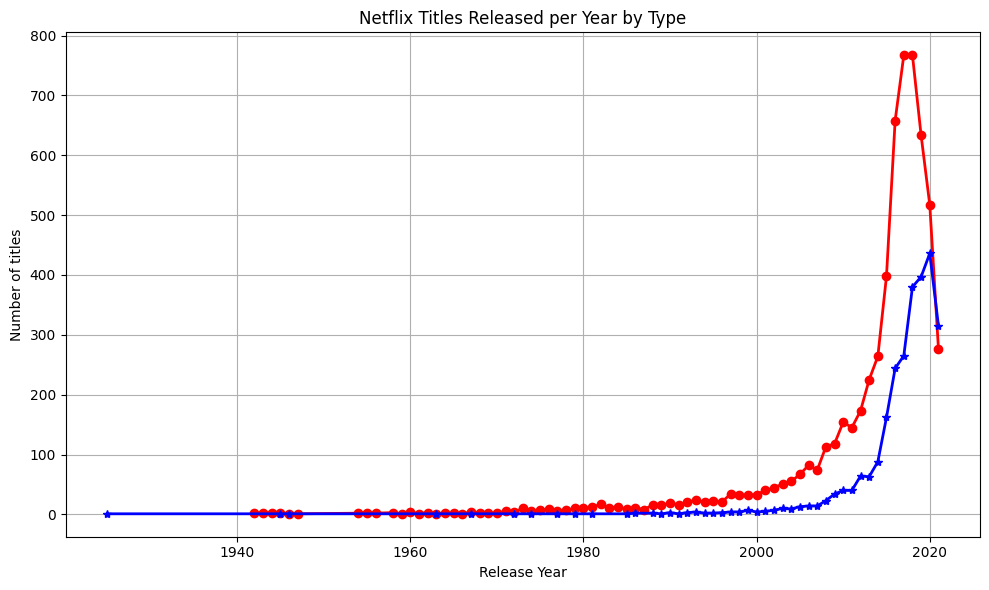

In [76]:
#Line Chart
plt.figure(figsize=(10,6))
movies_per_year = df[df["type"] == "Movie"]["release_year"].value_counts().sort_index()
shows_per_year = df[df["type"] == "TV Show"]["release_year"].value_counts().sort_index()

plt.plot(movies_per_year.index, movies_per_year.values,  color = "red", marker="o", linewidth = 2)
plt.plot(shows_per_year.index, shows_per_year.values, color="blue", marker="*", linewidth=2)
plt.xlabel("Release Year")
plt.ylabel("Number of titles")
plt.title("Netflix Titles Released per Year by Type")
plt.grid()
plt.tight_layout()
plt.show()

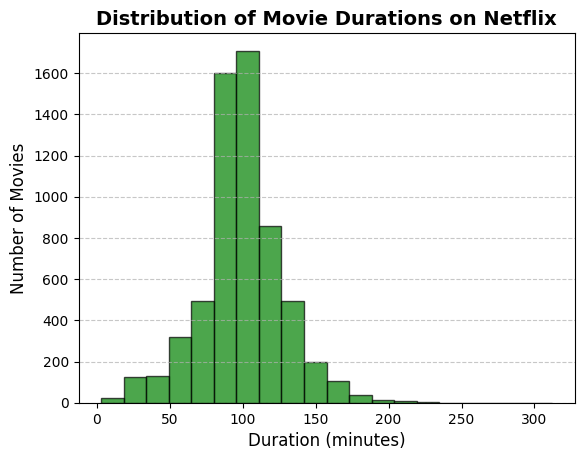

In [83]:
#Histogram
movie_duration = df[df["type"] == "Movie"]["duration"]
movie_duration = movie_duration.str.replace(" min", "", regex=False).astype(float)

plt.hist(movie_duration, bins=20, color="green", edgecolor="black", alpha=0.7)
plt.title("Distribution of Movie Durations on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

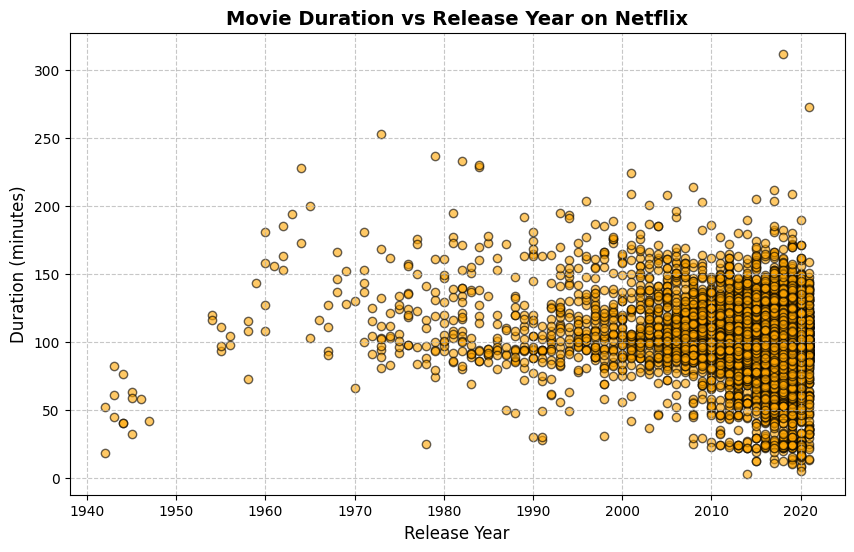

In [89]:
#Scatter Plot

movies_df = df[df["type"] == "Movie"].copy()
movies_df["duration"] = movies_df["duration"].str.replace(" min", "", regex=False).astype(float)
plt.figure(figsize=(10,6))
plt.scatter(movies_df["release_year"], movies_df["duration"], color="orange", alpha=0.6, edgecolor="black")

plt.title("Movie Duration vs Release Year on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Duration (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()